# Exercícios para entrega (Prova)

## Questão 6

$p(x|\omega_{1}) \backsim \mathcal{N}\left(\mu_{1}=\begin{bmatrix}0\\0\end{bmatrix}, \Sigma_{1}=\begin{bmatrix}28&0\\0&1\end{bmatrix}\right)$

$p(x|\omega_{2}) \backsim \mathcal{N}\left(\mu_{2}=\begin{bmatrix}0\\4\end{bmatrix}, \Sigma_{2}=\begin{bmatrix}1&0\\0&1\end{bmatrix}\right)$

$P(\omega_{1}) = P(\omega_{2}) = \dfrac{1}{2}$

In [1]:
# Importação de módulos
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [3]:
# Delimitação de dimensões para as figuras
X_MIN = 0
X_MAX = 20
N_PONTOS = 2000

## Item (b)

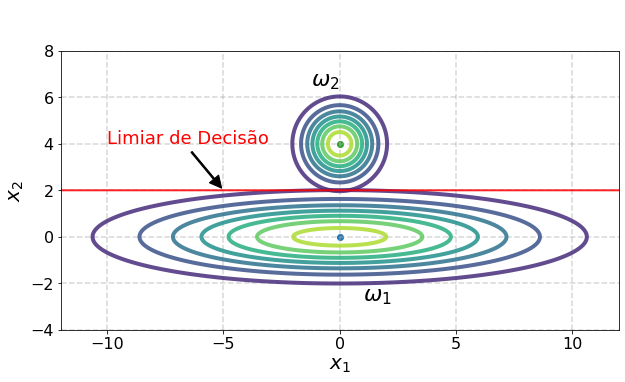

In [15]:
x, y = np.mgrid[-12:12.01:0.01, -12:12.01:0.01]
pos = np.dstack((x, y))

mu1 = [0, 0]
mu2 = [0, 4]

epsilon1 = [[28, 0], [0, 1]]
epsilon2 = [[1, 0], [0, 1]]

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(mu1[0], mu1[1], color='C0')
plt.scatter(mu2[0], mu2[1], color='C2')

rv1 = multivariate_normal(mu1, epsilon1)
plt.annotate(r'$\omega_{1}$', xy=(1.0, -2.75), fontsize=22)
rv2 = multivariate_normal(mu2, epsilon2)
plt.annotate(r'$\omega_{2}$', xy=(-1.25, 6.50), fontsize=22)

plt.contour(x, y, rv1.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv1.pdf(pos))

plt.contour(x, y, rv2.pdf(pos), linewidths=4, alpha=0.85)
# plt.contourf(x, y, rv2.pdf(pos))

# plt.colorbar()

a = 0
b = 2

x1 = np.linspace(-12, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.annotate('Limiar de Decisão', 
             xy=(-5, 2), 
             xytext=(-10, 4), 
             arrowprops=dict(facecolor='black', 
                             shrink=0.05, 
                             width=1.5, 
                             edgecolor='black'), 
             color='red', 
             fontsize=18)

plt.annotate(r'$x_{2} = -\dfrac{6}{7}x_{1} + \dfrac{109}{14}$', xy=(-1, 9), fontsize=16, color='red')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-12, 12)
plt.ylim(-4, 8)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_06b.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

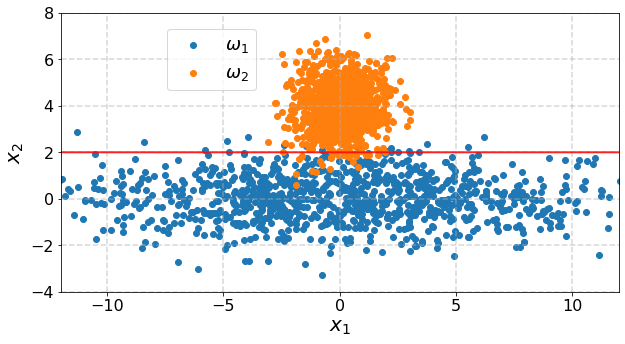

In [16]:
np.random.seed(211)
dados_1 = np.random.multivariate_normal(mu1, epsilon1, size=int(N_PONTOS * 0.5))

np.random.seed(350)
dados_2 = np.random.multivariate_normal(mu2, epsilon2, size=int(N_PONTOS * 0.5))

plt.figure(figsize=(10, 8))
plt.axes().set_aspect('equal')

plt.scatter(dados_1[:, 0], dados_1[:, 1], label=r'$\omega_{1}$')
plt.scatter(dados_2[:, 0], dados_2[:, 1], label=r'$\omega_{2}$')

plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(0.175, 0.975))

a = 0
b = 2
x1 = np.linspace(-12, 12, 10000, endpoint=True)
x2 = a * x1 + b
plt.plot(x1, x2, LineWidth=2, linestyle='-', color='red', alpha=0.85)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x_{1}$', fontsize=20)
plt.ylabel(r'$x_{2}$', fontsize=20)
plt.xlim(-12, 12)
plt.ylim(-4, 8)

plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.5)

plt.savefig('ml_prova_06b_amostras.pdf', formar='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [22]:
def classifica(amostra, limiar):
    x0 = amostra[0]
    y0 = amostra[1]
    a = limiar[0]
    b = limiar[1]
    
    r = a * x0 + b
    
    if y0 < r:
        return 1
    else:
        return 2

In [23]:
classifica(amostra=dados_1[0], limiar=[0, 2])

1

In [24]:
def classifica_conjunto(amostras, limiar):
    classes = []
    for amostra in amostras:
        classes.append(classifica(amostra, limiar))
    return np.array(classes)

In [25]:
T = [1] * int(N_PONTOS * 0.5)
T.extend([2] * int(N_PONTOS * 0.5))
y_true = np.array(T)

y_pred_1 = classifica_conjunto(dados_1, [a, b])
y_pred_2 = classifica_conjunto(dados_2, [a, b])
y_pred = np.concatenate((y_pred_1, y_pred_2), axis=None)

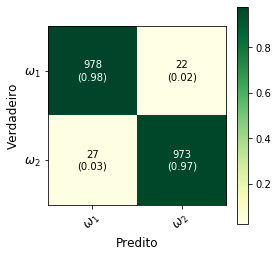

In [26]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

CM = confusion_matrix(y_true, y_pred)
nomes_das_classes = [r'$\omega_{1}$', r'$\omega_{2}$']

plot_confusion_matrix(conf_mat=CM, 
                      show_absolute=True, 
                      show_normed=True, 
                      colorbar=True, 
                      class_names=nomes_das_classes, 
                      figsize=(4, 4), 
                      cmap='YlGn')

plt.xlabel('Predito', fontsize=12)
plt.ylabel('Verdadeiro', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('ml_prova_06b_matriz_confusao.pdf', format='pdf', dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [27]:
# Avaliação de desempenho
from mlxtend.evaluate import scoring

erro = scoring(y_true, y_pred, metric='error')
acuracia = scoring(y_true, y_pred, metric='accuracy')
sensibilidade = scoring(y_true, y_pred, metric='sensitivity')
especificidade = scoring(y_true, y_pred, metric='specificity')

print('Verdadeiros Positivos: \t%d' % CM[0, 0])
print('Falsos Negativos: \t%d' % CM[0, 1])
print('Falsos Positivos: \t%d' % CM[1, 0])
print('Verdadeiros Negativos: \t%d' % CM[1, 1])

print('\n====================================\n')

print('Erro: \t\t%3.4f %%' % (erro * 100))
print('Acurácia: \t%3.4f %%' % (acuracia * 100))
print('Sensibilidade: \t%3.4f %%' % (sensibilidade * 100))
print('Especificidade: %3.4f %%' % (especificidade * 100))

Verdadeiros Positivos: 	978
Falsos Negativos: 	22
Falsos Positivos: 	27
Verdadeiros Negativos: 	973


Erro: 		2.4500 %
Acurácia: 	97.5500 %
Sensibilidade: 	97.8000 %
Especificidade: 97.3000 %
